In [33]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential

from keras.layers import Input, Flatten, Dense, Conv2D
from keras.models import Model
from keras.optimizers import Adam
from keras.utils import to_categorical

from keras.datasets import cifar10

In [34]:
from google.colab import drive
drive.mount("/content/gdrive")


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [35]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [36]:
NUM_CLASSES = 10 ##총 class = 10개 
x_train = x_train.astype('float32') / 255.0 ## -1~1사이에 있을 때 신경망이 가장 잘 동작함으로 255로 나눈다 
x_test = x_test.astype('float32') / 255.0

y_train = to_categorical(y_train, NUM_CLASSES) ##변환된 y_Train = [50000,10]  one hot encoding 시키는게 to_categorical
y_test = to_categorical(y_test, NUM_CLASSES)

In [37]:
x_train[54, 12, 13, 1]  ## -> 54번째 사진의 12,13 픽셀의 RGB중 초록(1차원) 값이 0.35~~이거다 

0.36862746

In [38]:
input_layer = Input((32,32,3)) ##네트워크가 기대하는 입력 데이터 크기를 튜플로 알려주는 것, 배치크기는 지정하지 않음 

####### 함수형 API를 사용해서 만든것 #########

x = Flatten()(input_layer)##하나의 벡터로 펼치는 것 (32*32*3) -> 3072

x = Dense(200, activation = 'relu')(x) ##dense == fully connected layer
x = Dense(150, activation = 'relu')(x)

output_layer = Dense(NUM_CLASSES, activation = 'softmax')(x)

model = Model(input_layer, output_layer)

###### Sequential 모델을 사용한 네트워크#########

model2 = Sequential([
                    Dense(200,activation='relu',input_shape=(32,32,3)),
                    Flatten(),
                    Dense(150,activation='relu'),
                    Dense(10,activation='softmax'),
])


In [39]:
model.summary()

Model: "model_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        (None, 32, 32, 3)         0         
_________________________________________________________________
flatten_21 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dense_53 (Dense)             (None, 200)               614600    
_________________________________________________________________
dense_54 (Dense)             (None, 150)               30150     
_________________________________________________________________
dense_55 (Dense)             (None, 10)                1510      
Total params: 646,260
Trainable params: 646,260
Non-trainable params: 0
_________________________________________________________________


In [40]:
model2.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_56 (Dense)             (None, 32, 32, 200)       800       
_________________________________________________________________
flatten_22 (Flatten)         (None, 204800)            0         
_________________________________________________________________
dense_57 (Dense)             (None, 150)               30720150  
_________________________________________________________________
dense_58 (Dense)             (None, 10)                1510      
Total params: 30,722,460
Trainable params: 30,722,460
Non-trainable params: 0
_________________________________________________________________


In [41]:
opt = Adam(lr=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [42]:
model.fit(x_train
          , y_train
          , batch_size=32
          , epochs=10
          , shuffle=True)

Epoch 1/10
50000/50000 [==============================] - 15s 291us/step - loss: 1.8506 - accuracy: 0.3339
Epoch 2/10
50000/50000 [==============================] - 15s 290us/step - loss: 1.6651 - accuracy: 0.4062
Epoch 3/10
50000/50000 [==============================] - 14s 288us/step - loss: 1.5890 - accuracy: 0.4315
Epoch 4/10
50000/50000 [==============================] - 14s 286us/step - loss: 1.5372 - accuracy: 0.4537
Epoch 5/10
50000/50000 [==============================] - 14s 284us/step - loss: 1.4990 - accuracy: 0.4673
Epoch 6/10
50000/50000 [==============================] - 14s 288us/step - loss: 1.4706 - accuracy: 0.4764
Epoch 7/10
50000/50000 [==============================] - 14s 285us/step - loss: 1.4429 - accuracy: 0.4876
Epoch 8/10
50000/50000 [==============================] - 14s 289us/step - loss: 1.4213 - accuracy: 0.4980
Epoch 9/10
50000/50000 [==============================] - 14s 289us/step - loss: 1.3995 - accuracy: 0.4995
Epoch 10/10
50000/50000 [============

In [44]:
##모델 평가해봅시다~ 
model.evaluate(x_test, y_test)


10000/10000 [==============================] - 1s 102us/step


[1.4380424882888794, 0.4934999942779541]

In [45]:
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis = -1)]
actual_single = CLASSES[np.argmax(y_test, axis = -1)]

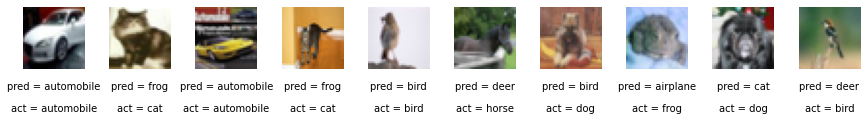

In [46]:

n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10, ha='center', transform=ax.transAxes) 
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img)
